# MARQUER Matthieu
## Projet 10: Détectez des faux billets avec R ou Python
![alt text](ONCFM.png "Détectez des faux billets")

![alt text](postit.png "Post it")

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### Importation des fichiers excel

In [2]:
# Import csv
billets = pd.read_csv('billets.csv', sep=";")
billets_production = pd.read_csv('billets_production.csv') 
# Copie de billets production pour régression logistique
billets_prod_reg_log = billets_production.copy() 

### 1.0 - Vue global

In [3]:
billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [4]:
# Vérification des types
billets.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [5]:
# Recherche des valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
# Vérification 
billets.describe(include='all')

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

-----------------------------

### Traitement valeur manquante: margin_low

In [7]:
# Df des margin_low = NaN
billets_notclean = billets.loc[billets['margin_low'].isnull()]
billets_notclean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [8]:
# Verif 37 billets avec margin_low = NaN
billets_notclean.shape

(37, 7)

In [9]:
# Df sans les margin_low manquants
billets_clean = billets.dropna()
billets_clean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

In [10]:
# Idem (pour copy)
billets_clean2 = billets.dropna()
billets_clean2

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

# Début

### Vrais billets

In [11]:
vrais_billets = billets.loc[billets["is_genuine"].isin([True]),:]
vrais_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
1          True    171.46       103.36        103.66        3.77       2.99   
2          True    172.69       104.48        103.50        4.40       2.94   
3          True    171.36       103.91        103.94        3.62       3.01   
4          True    171.73       104.28        103.46        4.04       3.48   
..          ...       ...          ...           ...         ...        ...   
995        True    171.66       103.92        103.47        4.26       2.83   
996        True    172.16       103.72        103.61        4.30       2.72   
997        True    171.78       103.38        104.22        4.23       3.07   
998        True    171.44       103.96        103.92        3.68       2.89   
999        True    171.56       104.07        103.58        3.55       3.02   

     length  
0    112.83  
1    113.09  
2    113.16  
3    113.51  
4    112.54  
..      ...  
995  113.20  
996  113.51  
997  113.77  
998  113.21  
999  112.96  

[1000 rows x 7 columns]

In [12]:
vrais_billets.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [13]:
vrais_billets_clean = vrais_billets.dropna()
vrais_billets_clean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
1          True    171.46       103.36        103.66        3.77       2.99   
2          True    172.69       104.48        103.50        4.40       2.94   
3          True    171.36       103.91        103.94        3.62       3.01   
4          True    171.73       104.28        103.46        4.04       3.48   
..          ...       ...          ...           ...         ...        ...   
995        True    171.66       103.92        103.47        4.26       2.83   
996        True    172.16       103.72        103.61        4.30       2.72   
997        True    171.78       103.38        104.22        4.23       3.07   
998        True    171.44       103.96        103.92        3.68       2.89   
999        True    171.56       104.07        103.58        3.55       3.02   

     length  
0    112.83  
1    113.09  
2    113.16  
3    113.51  
4    112.54  
..      ...  
995  113.20  
996  113.51  
997  113.77  
998  113.21  
999  112.96  

[971 rows x 7 columns]

### Faux billets

In [14]:
faux_billets = billets.loc[billets["is_genuine"].isin([False]),:]
faux_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1000       False    172.28       103.95        103.91        4.78       3.31   
1001       False    171.92       103.86        104.30        4.96       3.13   
1002       False    171.59       104.14        104.38        4.97       3.47   
1003       False    172.02       104.33        104.33        5.19       3.21   
1004       False    172.55       104.25        104.23        5.60       3.13   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
1000  111.40  
1001  111.29  
1002  111.22  
1003  111.99  
1004  111.72  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[500 rows x 7 columns]

In [15]:
faux_billets.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

In [16]:
faux_billets_clean = faux_billets.dropna()
faux_billets_clean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1000       False    172.28       103.95        103.91        4.78       3.31   
1001       False    171.92       103.86        104.30        4.96       3.13   
1002       False    171.59       104.14        104.38        4.97       3.47   
1003       False    172.02       104.33        104.33        5.19       3.21   
1004       False    172.55       104.25        104.23        5.60       3.13   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
1000  111.40  
1001  111.29  
1002  111.22  
1003  111.99  
1004  111.72  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[492 rows x 7 columns]

## Visuel de billets

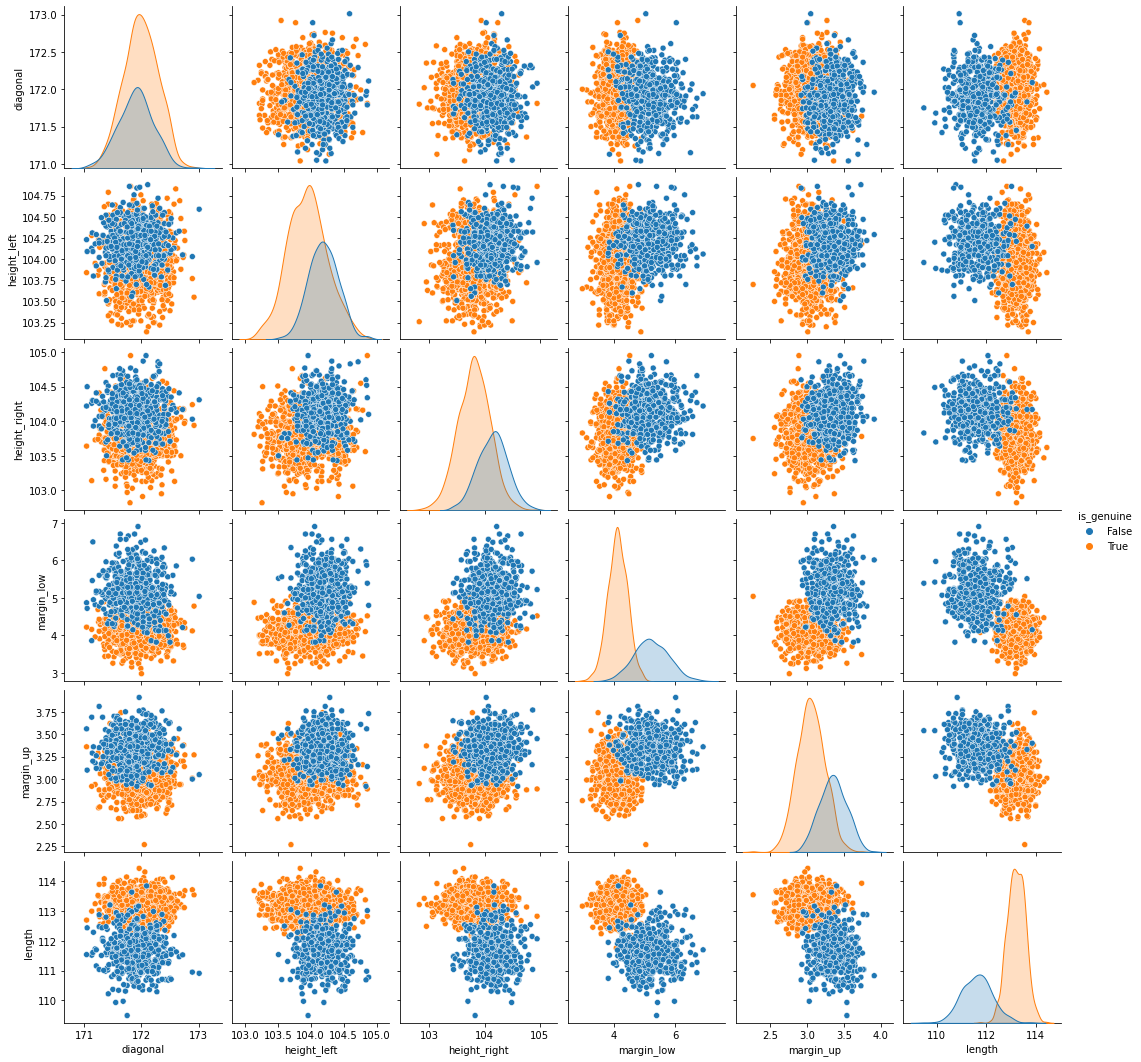

In [17]:
sns.pairplot(billets, hue="is_genuine")

In [18]:
from ydata_profiling import ProfileReport
ProfileReport(billets)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Boxplot

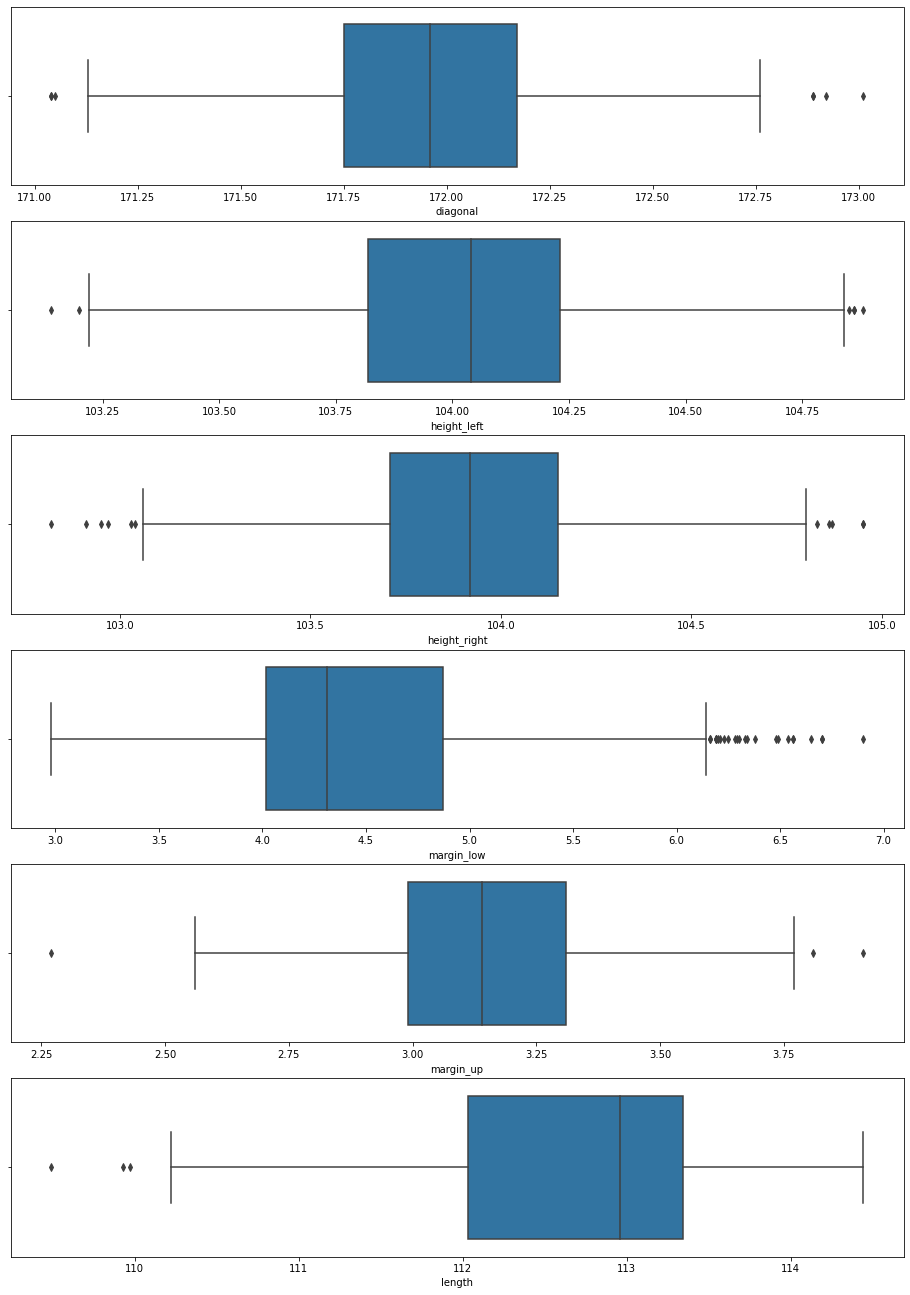

In [19]:
# boxplot sur "billets" (jeu entier(1500))
plt.figure(figsize=(16,23))
plt.subplot(611)
#plt.title("diagonal")
sns.boxplot(x='diagonal', data=billets)
plt.subplot(612)
#plt.title("height_left")
sns.boxplot(x='height_left', data=billets)
plt.subplot(613)
#plt.title("height_right")
sns.boxplot(x='height_right', data=billets)
plt.subplot(614)
#plt.title("margin_low")
sns.boxplot(x='margin_low', data=billets)
plt.subplot(615)
#plt.title("margin_up")
sns.boxplot(x='margin_up', data=billets)
plt.subplot(616)
#plt.title("length")
sns.boxplot(x='length', data=billets)
plt.show()

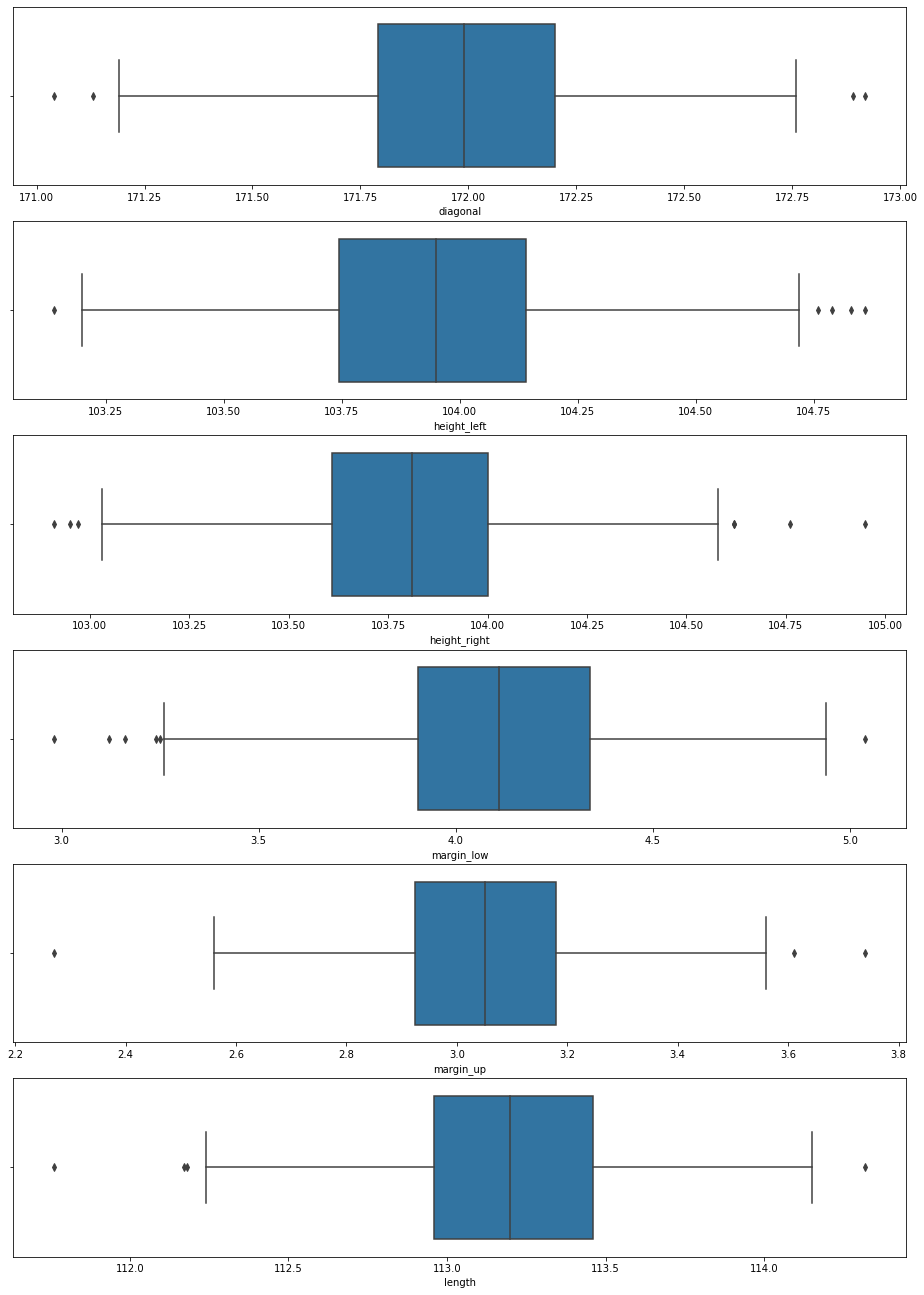

In [20]:
# Vrai sans margin_low manquant
plt.figure(figsize=(16,23))
plt.subplot(611)
#plt.title("diagonal")
sns.boxplot(x='diagonal', data=vrais_billets_clean)
plt.subplot(612)
#plt.title("height_left")
sns.boxplot(x='height_left', data=vrais_billets_clean)
plt.subplot(613)
#plt.title("height_right")
sns.boxplot(x='height_right', data=vrais_billets_clean)
plt.subplot(614)
#plt.title("margin_low")
sns.boxplot(x='margin_low', data=vrais_billets_clean)
plt.subplot(615)
#plt.title("margin_up")
sns.boxplot(x='margin_up', data=vrais_billets_clean)
plt.subplot(616)
#plt.title("length")
sns.boxplot(x='length', data=vrais_billets_clean)
plt.show()

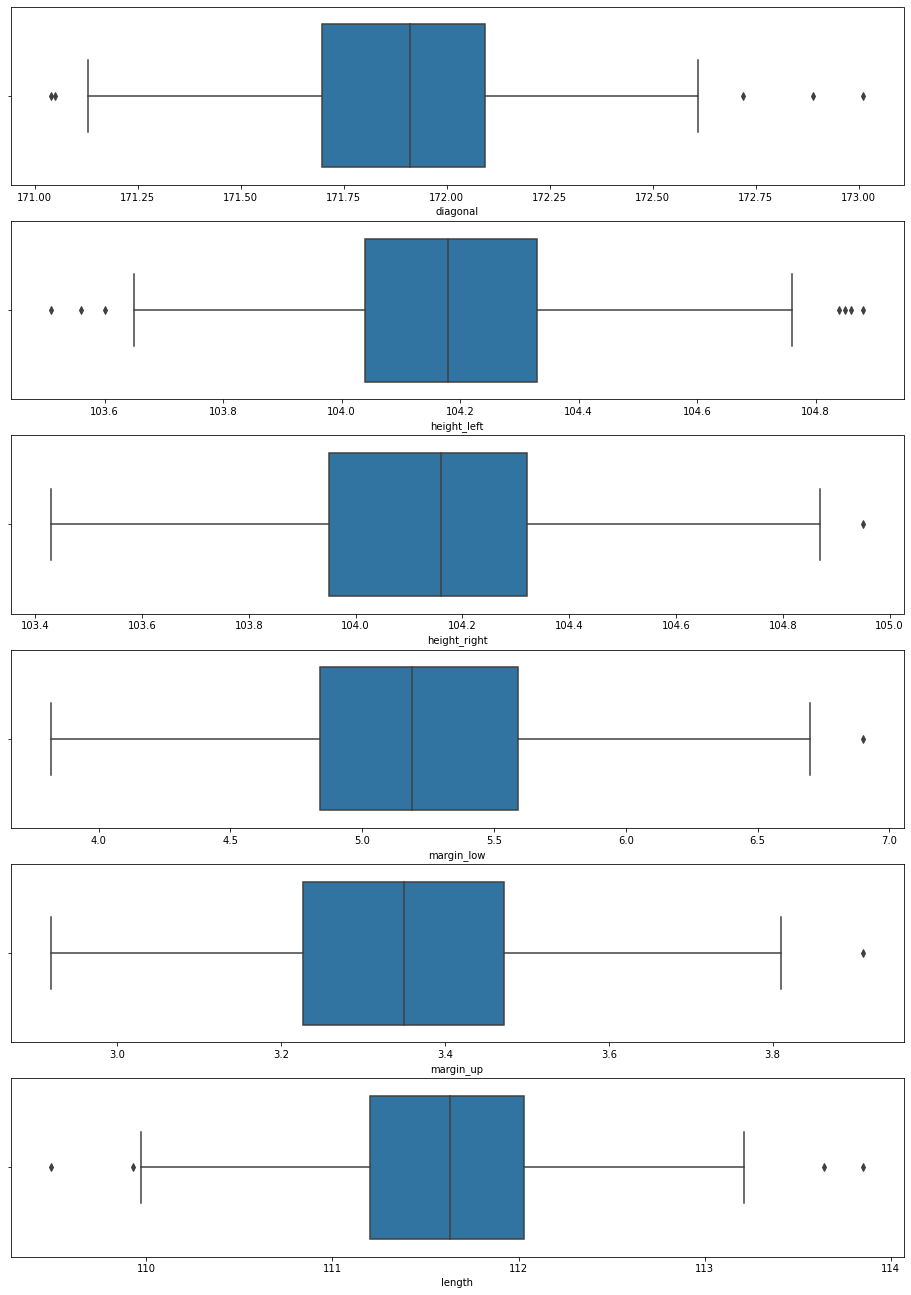

In [21]:
# Faux sans margin_low manquant
plt.figure(figsize=(16,23))
plt.subplot(611)
#plt.title("diagonal")
sns.boxplot(x='diagonal', data=faux_billets_clean)
plt.subplot(612)
#plt.title("height_left")
sns.boxplot(x='height_left', data=faux_billets_clean)
plt.subplot(613)
#plt.title("height_right")
sns.boxplot(x='height_right', data=faux_billets_clean)
plt.subplot(614)
#plt.title("margin_low")
sns.boxplot(x='margin_low', data=faux_billets_clean)
plt.subplot(615)
#plt.title("margin_up")
sns.boxplot(x='margin_up', data=faux_billets_clean)
plt.subplot(616)
#plt.title("length")
sns.boxplot(x='length', data=faux_billets_clean)
plt.show()

# Régression lineaire simple

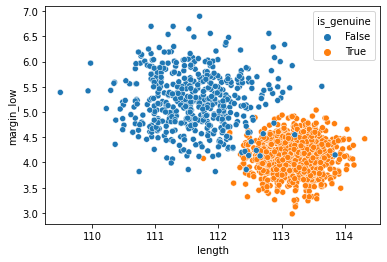

In [22]:
# Nuage de points margin_low / length:
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_clean)
plt.show()

In [23]:
# Réalisez une régression linéaire simple
import statsmodels.formula.api as smf
reg_simp = smf.ols('margin_low ~ length', data=billets_clean).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 25 May 2023   Prob (F-statistic):          8.98e-189
Time:                        09:37:17   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

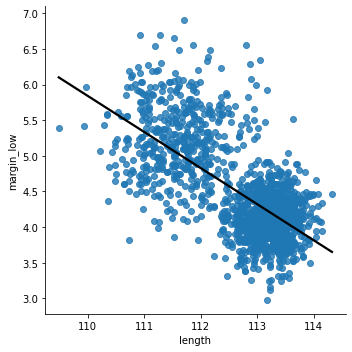

In [24]:
# Graphique
ax = sns.lmplot(x="length", y="margin_low", data=billets_clean, ci=None, line_kws={'color':'black'})
ax.set(xlabel='length', ylabel='margin_low')
plt.show()

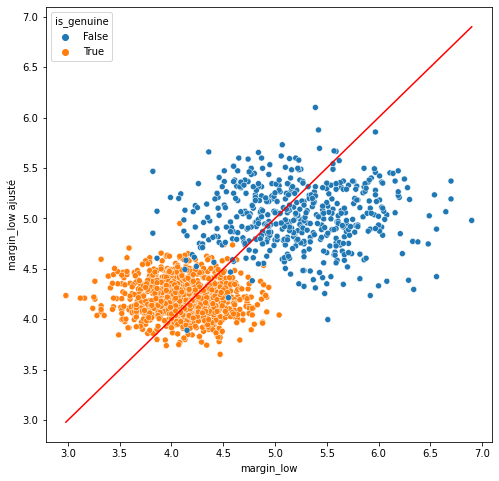

In [25]:
# Représentation des valeurs ajustées en fonction des valeurs observées:
billets_clean['margin_low_ajust_s'] = reg_simp.predict()
X_plot = [billets_clean['margin_low'].min(), billets_clean['margin_low'].max()]
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="margin_low", y="margin_low_ajust_s", hue='is_genuine', data=billets_clean)
ax.set(xlabel='margin_low', ylabel='margin_low ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()

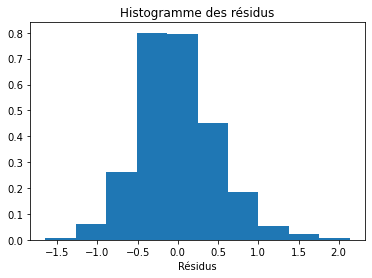

In [26]:
# Récupération des résidus du modèle:
billets_clean['residu_s'] = reg_simp.resid
# Histogramme des résidus
plt.hist(billets_clean['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()
# Histogramme centré et à peu près symétrique.

In [27]:
# Essai prévision de margin_low en fonction de length = 112.83:
a_prevoir = pd.DataFrame({'length':[112.83]})
margin_low_prev = reg_simp.predict(a_prevoir)
print(round(margin_low_prev[0], 2))

4.41


# Ajout des margin_low manquants

In [28]:
# Prédiction des 37 mangin_low manquants
billets_notclean2 = reg_simp.predict(billets_notclean.length)
billets_notclean2.head(2)

72    4.427556
99    4.280567
dtype: float64

In [29]:
# Ajout des valeurs dans le df
billets_notclean["margin_low"] = billets_notclean2
billets_notclean.head(2)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72        True    171.94       103.89        103.45    4.427556       3.25   
99        True    171.93       104.07        104.18    4.280567       3.14   

    length  
72  112.79  
99  113.08

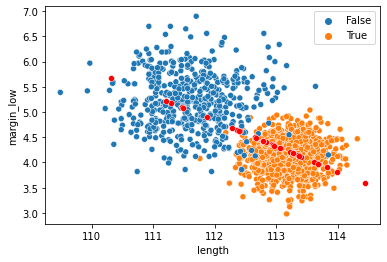

In [30]:
# Graphique avec affichage de margin_low calculé en rouge
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_clean)
sns.scatterplot(x="length", y="margin_low", data=billets_notclean, color="r")
plt.show()

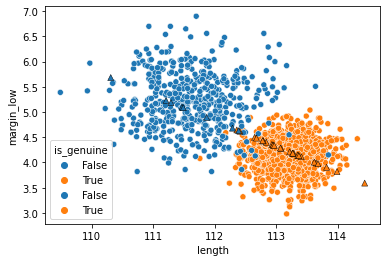

In [31]:
# Graphique global avec affichage de margin_low calculé en triangle
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_clean)
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_notclean, marker='^', edgecolor="k")
plt.show()

# Full billets

In [32]:
# Df avec l'ensemble des billets dont les margin_low calculés
full_billets = billets_clean2.append(billets_notclean)
full_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
...          ...       ...          ...           ...         ...        ...   
1303       False    172.17       104.49        103.76    5.228390       2.93   
1315       False    172.08       104.15        104.17    4.680984       3.40   
1347       False    171.72       104.46        104.12    5.684562       3.61   
1435       False    172.66       104.33        104.41    5.096607       3.56   
1438       False    171.90       104.28        104.29    5.086470       3.24   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49  

[1500 rows x 7 columns]

In [33]:
full_billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.484070     3.151473   
std       0.305195     0.299462      0.325627     0.659079     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.315000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [34]:
# Recherche des valeurs manquantes
full_billets.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# ACP: analyse en composantes principales

In [35]:
# Df avec Drop de "is_genuine"
billets_acp = full_billets.drop(['is_genuine'], axis=1)
billets_acp

diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95    4.520000       2.89  112.83
1       171.46       103.36        103.66    3.770000       2.99  113.09
2       172.69       104.48        103.50    4.400000       2.94  113.16
3       171.36       103.91        103.94    3.620000       3.01  113.51
4       171.73       104.28        103.46    4.040000       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1303    172.17       104.49        103.76    5.228390       2.93  111.21
1315    172.08       104.15        104.17    4.680984       3.40  112.29
1347    171.72       104.46        104.12    5.684562       3.61  110.31
1435    172.66       104.33        104.41    5.096607       3.56  111.47
1438    171.90       104.28        104.29    5.086470       3.24  111.49

[1500 rows x 6 columns]

In [36]:
# Transformer les données en array numpy
X = billets_acp.values

In [37]:
# Enregistrement pour "labels" sur graphique (=4)
index = billets_acp.index

In [38]:
# Enregistrement des noms de colonnes
features = billets_acp.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler
# Instanciation
scaler = StandardScaler()
# Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X)

In [40]:
# Vérification moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean  0.0  0.0 -0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [41]:
from sklearn.decomposition import PCA
# Travail sur les 4 premieres composantes
n_components = 4
# On instancie notre ACP
pca = PCA(n_components=4)
# Entrainement des données scalées
pca.fit(X_scaled)

PCA(n_components=4)

In [42]:
# Variance captée par chaque composante (% de chaque)
print(pca.explained_variance_ratio_)
# Total des 4 composantes (%)
print(pca.explained_variance_ratio_.sum())

[0.43223483 0.16956099 0.13029455 0.11835793]
0.8504483039718165


In [43]:
# Variance
evr = pca.explained_variance_ratio_
df_evr = pd.DataFrame (evr, columns =['Variance'])
df_evr.reset_index(inplace = True)
df_evr

index  Variance
0      0  0.432235
1      1  0.169561
2      2  0.130295
3      3  0.118358

In [44]:
# Enregistrement dans variable "scree" et "scree_cum"
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
# Variable: liste de composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

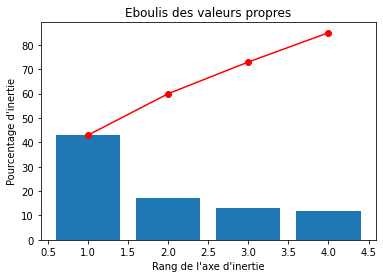

In [45]:
# Vue graphique Eboulis des valeurs propres Bleu: variance de chaque composante    Rouge: variance cumulée    dont + de 90% en 5 composantes
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig("Eboulis.png")
plt.show()

#On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
#On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

In [46]:
# Formule de calcul donnée par l'attribut components_
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5
0 -0.084401  0.330678  0.393011  0.506870  0.439727 -0.528009
1  0.941143  0.307671  0.108904 -0.072658 -0.005222  0.049209
2 -0.289400  0.885142 -0.156397 -0.113438 -0.269697  0.150689
3 -0.102736 -0.053668  0.871774 -0.101162 -0.430522  0.176045

In [47]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
F1     -0.08         0.33          0.39        0.51       0.44   -0.53
F2      0.94         0.31          0.11       -0.07      -0.01    0.05
F3     -0.29         0.89         -0.16       -0.11      -0.27    0.15
F4     -0.10        -0.05          0.87       -0.10      -0.43    0.18

In [48]:
# affichage en pivot
pcs.T

F1        F2        F3        F4
diagonal     -0.084401  0.941143 -0.289400 -0.102736
height_left   0.330678  0.307671  0.885142 -0.053668
height_right  0.393011  0.108904 -0.156397  0.871774
margin_low    0.506870 -0.072658 -0.113438 -0.101162
margin_up     0.439727 -0.005222 -0.269697 -0.430522
length       -0.528009  0.049209  0.150689  0.176045

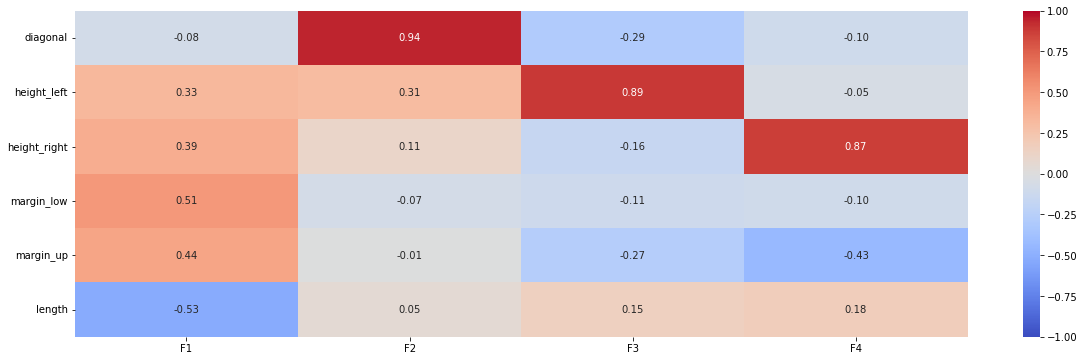

In [49]:
# Matrice de corrélation                              fmt = nb de chiffre apres la virgule
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig("Matrice.png")
plt.show()

In [50]:
# Fonction Correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(7, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.01,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) 

    # Axes et display
    plt.axis('equal')
    plt.savefig("CercleCorr.png")
    plt.show()

In [51]:
# Fonction Projection
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[7, 7], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,7)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig("Projection.png")
    plt.show()

In [52]:
# Calcule des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.64139112,  0.75058147,  2.42586388,  3.16955854],
       [-2.0207526 , -2.20718269, -0.99984146,  0.08340405],
       [-0.96960563,  2.62024403,  1.18368702, -0.9497819 ],
       [-1.37913336, -1.8169363 ,  0.66179995,  0.83897215],
       [ 0.14970114, -0.56750899,  0.84860768, -1.77083542]])

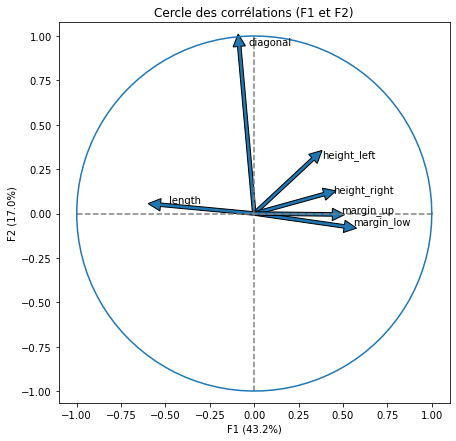

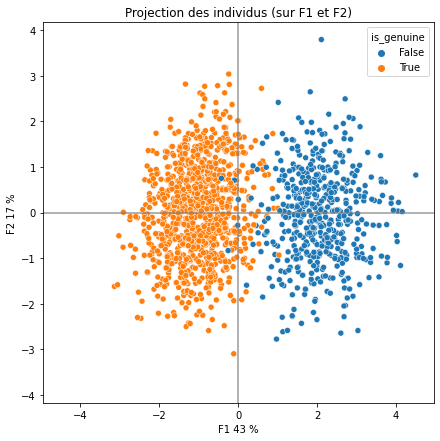

In [53]:
# Graphique F1 F2
correlation_graph(pca, (0,1), features) 
display_factorial_planes(X_proj, (0,1), pca, clusters=full_billets['is_genuine'], marker="o") 

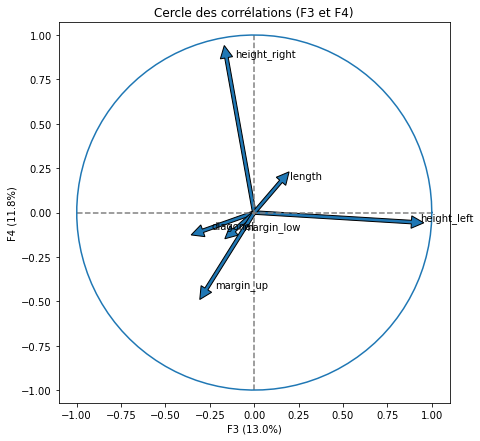

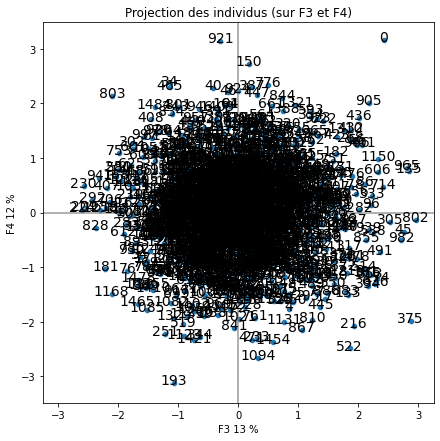

In [54]:
# Graphique F3 F4
correlation_graph(pca, (2,3), features)
display_factorial_planes(X_proj, (2,3), pca, labels=index, marker="o")

In [55]:
# Fin ACP

# K-means

In [56]:
from sklearn.cluster import KMeans

In [57]:
# Df copy de full_billets pour les k-means
billets_kmeans = full_billets.copy()
billets_kmeans

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
...          ...       ...          ...           ...         ...        ...   
1303       False    172.17       104.49        103.76    5.228390       2.93   
1315       False    172.08       104.15        104.17    4.680984       3.40   
1347       False    171.72       104.46        104.12    5.684562       3.61   
1435       False    172.66       104.33        104.41    5.096607       3.56   
1438       False    171.90       104.28        104.29    5.086470       3.24   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49  

[1500 rows x 7 columns]

In [58]:
# Récupération des valeurs
X = billets_kmeans[billets_kmeans.columns[1:]].values
y = billets_kmeans['is_genuine'].values

In [59]:
X

array([[171.81      , 104.86      , 104.95      ,   4.52      ,
          2.89      , 112.83      ],
       [171.46      , 103.36      , 103.66      ,   3.77      ,
          2.99      , 113.09      ],
       [172.69      , 104.48      , 103.5       ,   4.4       ,
          2.94      , 113.16      ],
       ...,
       [171.72      , 104.46      , 104.12      ,   5.6845621 ,
          3.61      , 110.31      ],
       [172.66      , 104.33      , 104.41      ,   5.09660744,
          3.56      , 111.47      ],
       [171.9       , 104.28      , 104.29      ,   5.08647029,
          3.24      , 111.49      ]])

In [60]:
y

array([ True,  True,  True, ..., False, False, False])

In [61]:
# Découpe du jeu en 70 - 30 %
# X_train: Matrice données d'entrainement, X_test matrice de test, y_train: vecteur d'etiquette d'entrainement, y_test de test
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
# 30% des données dans le jeu de test  et random_state = fige la découpe

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050, 6), (450, 6), (1050,), (450,))

In [63]:
# Enregistrement des noms de colonnes
features = billets_kmeans.columns
features = features.delete(0)
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [64]:
# Instanciation
scaler = StandardScaler()
# Standarbisation Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X_train)
X_scaled

array([[ 1.60578587e+00, -2.59134483e-01, -1.25267925e+00,
        -5.49794882e-01, -2.95632488e-01,  6.13934799e-01],
       [-4.60110565e-03, -1.15877477e+00, -2.27986878e-01,
         2.70137379e-04, -3.38931988e-01,  4.45031066e-02],
       [ 1.21140539e+00,  5.07225762e-01,  3.74773343e-01,
        -2.59482789e-01, -6.85327985e-01,  1.60172447e+00],
       ...,
       [ 2.00016636e+00, -8.25574663e-01, -8.00609087e-01,
        -2.90041956e-01, -4.68830487e-01,  3.46650535e-01],
       [ 7.51294822e-01,  2.00662624e+00,  1.58029378e+00,
         1.23791643e+00,  9.60053001e-01, -2.01242362e+00],
       [ 4.22644419e-01, -1.09213475e+00,  1.06794760e+00,
         1.63518561e+00,  1.56624600e+00, -5.83033860e-01]])

In [65]:
# Vérification moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean  0.0  0.0 -0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [66]:
# Valeur vide 
intertia = []
# Nb cluster
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [67]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  intertia.append(kmeans.inertia_)

In [68]:
intertia

[6300.000000000004,
 4094.7285931058213,
 3586.6737788695514,
 3270.33825465181,
 3046.1529106780977,
 2864.3478967025544,
 2739.446635384226,
 2627.401353383256,
 2520.7909162477754]

### Test du coude

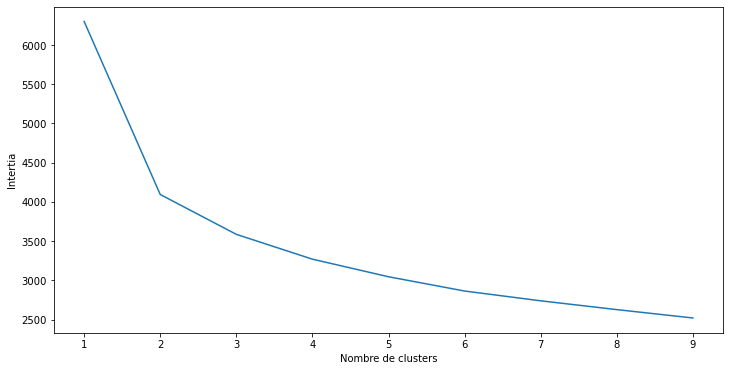

In [69]:
# Graphique
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Intertia")
ax.set_xlabel("Nombre de clusters")
ax = plt.plot(k_list, intertia)

In [70]:
# fin des tests

In [71]:
kmeans = KMeans(n_clusters=2, random_state=1)
#Entrainement
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=1)

# Pickle

In [72]:
import pickle

In [73]:
input = open("output.pickle", "rb")
kmeans = pickle.load(input)
kmeans

KMeans(n_clusters=2, random_state=1)

In [74]:
# Variable labels des clusters
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 0])

In [75]:
# Liste de lettre (une lettre par cluster)
dd = {i:j for i,j in enumerate(list("ab"))}
# Modifictation des chiffres de cluster en lettre
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b']

In [76]:
X_train

array([[172.45, 103.95, 103.5 ,   4.1 ,   3.08, 113.23],
       [171.96, 103.68, 103.84,   4.46,   3.07, 112.74],
       [172.33, 104.18, 104.04,   4.29,   2.99, 114.08],
       ...,
       [172.57, 103.78, 103.65,   4.27,   3.04, 113.  ],
       [172.19, 104.63, 104.44,   5.27,   3.37, 110.97],
       [172.09, 103.7 , 104.27,   5.53,   3.51, 112.2 ]])

In [77]:
y_train

array([ True,  True,  True, ...,  True, False, False])

In [78]:
# Création d'un DF des données de test (rappel: 70% de l'ensemble des données)
df_train = pd.DataFrame(X_train, y_train)
df_train = df_train.reset_index()
df_train = df_train.rename(columns={"index":"is_genuine"})
# Ajout de la variable Cluster (k-means)
df_train["cluster"] = labels
df_train

is_genuine       0       1       2     3     4       5 cluster
0           True  172.45  103.95  103.50  4.10  3.08  113.23       b
1           True  171.96  103.68  103.84  4.46  3.07  112.74       b
2           True  172.33  104.18  104.04  4.29  2.99  114.08       b
3           True  171.65  103.82  103.37  4.37  2.98  113.04       b
4           True  172.12  104.32  103.19  4.04  3.28  113.11       b
...          ...     ...     ...     ...   ...   ...     ...     ...
1045       False  171.92  104.29  104.27  5.76  3.13  111.37       a
1046       False  172.10  104.22  103.99  5.26  3.24  111.94       a
1047        True  172.57  103.78  103.65  4.27  3.04  113.00       b
1048       False  172.19  104.63  104.44  5.27  3.37  110.97       a
1049       False  172.09  103.70  104.27  5.53  3.51  112.20       a

[1050 rows x 8 columns]

In [79]:
# Df par cluster
Kmeans_cluster_A = df_train.loc[df_train['cluster']=='a']
Kmeans_cluster_B = df_train.loc[df_train['cluster']=='b']

In [80]:
# Tableau centroide
# valeur moyenne de chaque cluster définie
# Stockage des centroids dans une variable: 
centroids = kmeans.cluster_centers_
kmeans_centroids = pd.DataFrame(centroids, index=["cluster_A", "cluster_B"])
# Ajout des noms de colonnes
kmeans_centroids.columns = features
kmeans_centroids

diagonal  height_left  height_right  margin_low  margin_up  \
cluster_A -0.205850     0.565435      0.741876    1.144231   0.878280   
cluster_B  0.095184    -0.261455     -0.343040   -0.529087  -0.406113   

             length  
cluster_A -1.244594  
cluster_B  0.575495

In [81]:
Kmeans_cluster_A.shape, Kmeans_cluster_B.shape

((332, 8), (718, 8))

In [82]:
# Affichage nombre de billets vrai faux
vrais_billets_clean.shape, faux_billets_clean.shape

((971, 7), (492, 7))

In [83]:
# Création DF cluster A
centroide_a = pd.DataFrame(kmeans_centroids.loc[kmeans_centroids.index == "cluster_A",:].values) 
# Création DF cluster B
centroide_b = pd.DataFrame(kmeans_centroids.loc[kmeans_centroids.index == "cluster_B",:].values)

In [84]:
centroide_a

0         1         2         3        4         5
0 -0.20585  0.565435  0.741876  1.144231  0.87828 -1.244594

In [85]:
centroide_b

0         1        2         3         4         5
0  0.095184 -0.261455 -0.34304 -0.529087 -0.406113  0.575495

In [86]:
df_train

is_genuine       0       1       2     3     4       5 cluster
0           True  172.45  103.95  103.50  4.10  3.08  113.23       b
1           True  171.96  103.68  103.84  4.46  3.07  112.74       b
2           True  172.33  104.18  104.04  4.29  2.99  114.08       b
3           True  171.65  103.82  103.37  4.37  2.98  113.04       b
4           True  172.12  104.32  103.19  4.04  3.28  113.11       b
...          ...     ...     ...     ...   ...   ...     ...     ...
1045       False  171.92  104.29  104.27  5.76  3.13  111.37       a
1046       False  172.10  104.22  103.99  5.26  3.24  111.94       a
1047        True  172.57  103.78  103.65  4.27  3.04  113.00       b
1048       False  172.19  104.63  104.44  5.27  3.37  110.97       a
1049       False  172.09  103.70  104.27  5.53  3.51  112.20       a

[1050 rows x 8 columns]

In [87]:
# Matrice de comparaison entre is_genuine et cluster
# Verification du jeu d'entrainement
counter = pd.crosstab(df_train["is_genuine"], df_train["cluster"])
counter.T

is_genuine  False  True
cluster                
a             327     5
b               9   709

# Vérification sur jeu de TEST

In [88]:
# Création d'un DF des données de test (rappel: 30% de l'ensemble des données)
df_test = pd.DataFrame(X_test, y_test)
df_test = df_test.reset_index()
df_test = df_test.rename(columns={"index":"is_genuine"})
df_test

is_genuine       0       1       2         3     4       5
0         False  172.43  104.06  104.02  4.930000  3.33  111.59
1         False  171.53  104.25  104.17  4.300000  3.50  112.23
2          True  171.47  104.46  104.30  4.120000  3.06  113.59
3          True  171.70  104.32  104.07  4.210000  2.67  112.73
4          True  171.48  103.95  103.93  4.520000  2.91  113.21
..          ...     ...     ...     ...       ...   ...     ...
445       False  171.84  104.52  104.19  4.600000  3.47  110.64
446       False  172.16  104.03  104.44  5.330000  3.33  111.21
447        True  172.57  104.65  104.44  4.540000  2.99  113.16
448       False  171.91  104.13  104.24  5.280000  3.19  112.31
449       False  172.66  104.33  104.41  5.096607  3.56  111.47

[450 rows x 7 columns]

In [89]:
df_X_test = pd.DataFrame(X_test)
df_X_test

0       1       2         3     4       5
0    172.43  104.06  104.02  4.930000  3.33  111.59
1    171.53  104.25  104.17  4.300000  3.50  112.23
2    171.47  104.46  104.30  4.120000  3.06  113.59
3    171.70  104.32  104.07  4.210000  2.67  112.73
4    171.48  103.95  103.93  4.520000  2.91  113.21
..      ...     ...     ...       ...   ...     ...
445  171.84  104.52  104.19  4.600000  3.47  110.64
446  172.16  104.03  104.44  5.330000  3.33  111.21
447  172.57  104.65  104.44  4.540000  2.99  113.16
448  171.91  104.13  104.24  5.280000  3.19  112.31
449  172.66  104.33  104.41  5.096607  3.56  111.47

[450 rows x 6 columns]

In [90]:
# Ajout des noms de colonnes
df_X_test.columns = features
df_X_test

diagonal  height_left  height_right  margin_low  margin_up  length
0      172.43       104.06        104.02    4.930000       3.33  111.59
1      171.53       104.25        104.17    4.300000       3.50  112.23
2      171.47       104.46        104.30    4.120000       3.06  113.59
3      171.70       104.32        104.07    4.210000       2.67  112.73
4      171.48       103.95        103.93    4.520000       2.91  113.21
..        ...          ...           ...         ...        ...     ...
445    171.84       104.52        104.19    4.600000       3.47  110.64
446    172.16       104.03        104.44    5.330000       3.33  111.21
447    172.57       104.65        104.44    4.540000       2.99  113.16
448    171.91       104.13        104.24    5.280000       3.19  112.31
449    172.66       104.33        104.41    5.096607       3.56  111.47

[450 rows x 6 columns]

In [91]:
# Instanciation
scaler = StandardScaler()
# Standardisation: Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X_test)
X_scaled

array([[ 1.55911178e+00,  8.85767480e-02,  2.86450855e-01,
         5.84994836e-01,  7.32965052e-01, -1.15269862e+00],
       [-1.37359116e+00,  7.27135934e-01,  7.70199485e-01,
        -3.61565985e-01,  1.46135978e+00, -4.39474707e-01],
       [-1.56910469e+00,  1.43291188e+00,  1.18944830e+00,
        -6.32011934e-01, -4.23897170e-01,  1.07612611e+00],
       ...,
       [ 2.01531001e+00,  2.07147106e+00,  1.64094702e+00,
        -9.71386637e-04, -7.23824413e-01,  5.96928791e-01],
       [-1.35338810e-01,  3.23835396e-01,  9.95948845e-01,
         1.11086196e+00,  1.33110567e-01, -3.50321718e-01],
       [ 2.30858031e+00,  9.96002960e-01,  1.54419729e+00,
         8.35318767e-01,  1.71844028e+00, -1.28642810e+00]])

In [92]:
# Vérification moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0 -0.0 -0.0 -0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [93]:
# DF de X_scaled 
billets_test_stand = pd.DataFrame(X_scaled)
billets_test_stand

0         1         2         3         4         5
0    1.559112  0.088577  0.286451  0.584995  0.732965 -1.152699
1   -1.373591  0.727136  0.770199 -0.361566  1.461360 -0.439475
2   -1.569105  1.432912  1.189448 -0.632012 -0.423897  1.076126
3   -0.819636  0.962395  0.447700 -0.496789 -2.094920  0.117731
4   -1.536519 -0.281115 -0.003798 -0.031021 -1.066598  0.652649
..        ...       ...       ...       ...       ...       ...
445 -0.363438  1.634562  0.834699  0.089177  1.332820 -2.211390
446  0.679301 -0.012248  1.640947  1.185986  0.732965 -1.576175
447  2.015310  2.071471  1.640947 -0.000971 -0.723824  0.596929
448 -0.135339  0.323835  0.995949  1.110862  0.133111 -0.350322
449  2.308580  0.996003  1.544197  0.835319  1.718440 -1.286428

[450 rows x 6 columns]

In [94]:
# Distance euclidienne
def distance(line_df, centroide_x):
    distance_carre = 0
    for i in range(len(line_df)):
        distance_carre += (line_df[i] - centroide_x[i])** 2
    return math.sqrt(distance_carre)

# Résultat VRAI FAUX
for index, line in billets_test_stand.iterrows():
    distance_a = distance(line, centroide_a)
    distance_b = distance(line, centroide_b)
    
    if distance_a < distance_b:
        df_X_test.loc[index, "cluster"] = "False"
    else:
        df_X_test.loc[index, "cluster"] = "True"

In [95]:
# Affichage résultat
df_X_test

diagonal  height_left  height_right  margin_low  margin_up  length  \
0      172.43       104.06        104.02    4.930000       3.33  111.59   
1      171.53       104.25        104.17    4.300000       3.50  112.23   
2      171.47       104.46        104.30    4.120000       3.06  113.59   
3      171.70       104.32        104.07    4.210000       2.67  112.73   
4      171.48       103.95        103.93    4.520000       2.91  113.21   
..        ...          ...           ...         ...        ...     ...   
445    171.84       104.52        104.19    4.600000       3.47  110.64   
446    172.16       104.03        104.44    5.330000       3.33  111.21   
447    172.57       104.65        104.44    4.540000       2.99  113.16   
448    171.91       104.13        104.24    5.280000       3.19  112.31   
449    172.66       104.33        104.41    5.096607       3.56  111.47   

    cluster  
0     False  
1     False  
2      True  
3      True  
4      True  
..      ...  
445   False  
446   False  
447    True  
448   False  
449   False  

[450 rows x 7 columns]

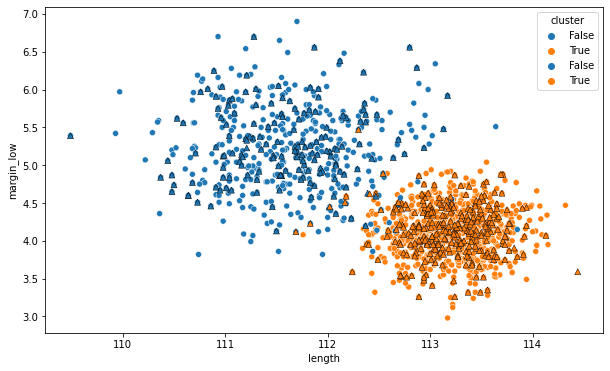

In [96]:
# Graphique avec affichage de margin_low calculé en rouge
plt.figure(figsize=(10,6))
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_clean)
sns.scatterplot(x="length", y="margin_low", data=df_X_test, hue="cluster", marker='^', edgecolor="k")
plt.show()

In [97]:
# Verification du jeu de test Matrice de confusion
counter = pd.crosstab(df_test["is_genuine"], df_X_test["cluster"])
counter.T

is_genuine  False  True
cluster                
False         158     1
True            6   285

# Comparaison k-means avec jeu de test: "billets_production"

In [98]:
# Suppression de "id" sur jeu de test
billets_prod = billets_production.drop(['id'], axis=1)
billets_prod

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.76       104.01        103.54        5.21       3.30  111.42
1    171.87       104.17        104.13        6.00       3.31  112.09
2    172.00       104.58        104.29        4.99       3.39  111.57
3    172.49       104.55        104.34        4.44       3.03  113.20
4    171.65       103.63        103.56        3.77       3.16  113.33

In [99]:
# Transformation des données en array numpy
X = billets_prod.values

In [100]:
# Nombre (4)
index = billets_prod.index

In [101]:
# Enregistrement des noms de colonnes
features = billets_prod.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [102]:
# Instanciation
scaler = StandardScaler()
# Standardisation: Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X)

In [103]:
# Vérification moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0     1     2     3     4     5
mean -0.00 -0.00 -0.00 -0.00  0.00 -0.00
std   1.12  1.12  1.12  1.12  1.12  1.12

In [104]:
# DF de X_scaled 
billets_prod_stand = pd.DataFrame(X_scaled)
billets_prod_stand

0         1         2         3         4         5
0 -0.664228 -0.502224 -1.228900  0.438224  0.485681 -1.124014
1 -0.287604 -0.050787  0.449459  1.493702  0.564017 -0.289103
2  0.157497  1.106022  0.904607  0.144293  1.190702 -0.937094
3  1.835186  1.021377  1.046841 -0.590533 -1.629382  1.094107
4 -1.040852 -1.574388 -1.172007 -1.485686 -0.611018  1.256104

In [105]:
# Résultat VRAI FAUX
for index, line in billets_prod_stand.iterrows():
    distance_a = distance(line, centroide_a)
    distance_b = distance(line, centroide_b)
    
    if distance_a < distance_b:
        billets_production.loc[index, "cluster"] = "False"
    else:
        billets_production.loc[index, "cluster"] = "True"

In [106]:
# affichage résultat
billets_production

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

  cluster  
0   False  
1   False  
2   False  
3    True  
4    True

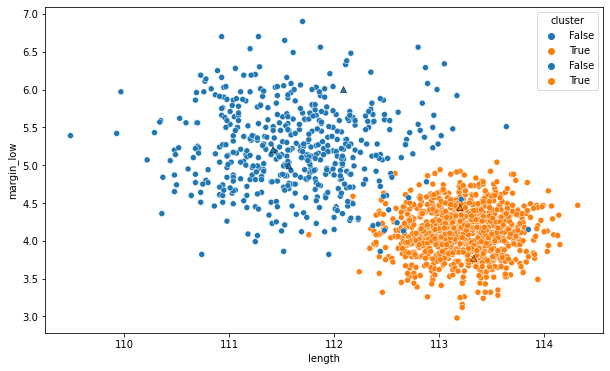

In [107]:
# Graphique avec affichage de margin_low calculé en rouge
plt.figure(figsize=(10,6))
sns.scatterplot(x="length", y="margin_low", hue='is_genuine', data=billets_clean)
sns.scatterplot(x="length", y="margin_low", data=billets_production, hue="cluster", marker='^', edgecolor="k")
plt.show()

# Régression logistique

In [108]:
# Ajout colonne cl_margin_low
billets_clean2['cl_margin_low'] = pd.cut(billets_clean2['margin_low'], bins = np.arange(2.5, 7.5, 1), right=False)
prop = pd.crosstab(billets_clean2['cl_margin_low'], billets_clean2['is_genuine'], normalize='index')
prop_is_genuine = pd.DataFrame(data = {'margin_low': np.concatenate((np.array([3]), 
                                                       np.repeat(np.arange(3.5,6.5,1), repeats=2), 
                                                       np.array([7])), axis=0),
                                       'prop_is_genuine': np.repeat(prop.loc[:,1].values, repeats=2)})

In [109]:
billets_clean2

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length cl_margin_low  
0     112.83    [4.5, 5.5)  
1     113.09    [3.5, 4.5)  
2     113.16    [3.5, 4.5)  
3     113.51    [3.5, 4.5)  
4     112.54    [3.5, 4.5)  
...      ...           ...  
1495  111.28    [3.5, 4.5)  
1496  110.97    [4.5, 5.5)  
1497  111.95    [5.5, 6.5)  
1498  112.25    [4.5, 5.5)  
1499  112.07    [4.5, 5.5)  

[1463 rows x 8 columns]

### Effectuez la régression logistique

In [110]:
import statsmodels.api as sm

In [111]:
reg_log1 = smf.glm('is_genuine ~ margin_low', data=billets_clean2, family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1463
Model:                                                   GLM   Df Residuals:                     1461
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -317.60
Date:                                       Thu, 25 May 2023   Deviance:                       635.21
Time:                                               09:37:35   Pearson chi2:                 1.75e+03
No. Iterations:                                            7   Pseudo R-squ. (CS):             0.5695
Covariance Type:                                   nonrobust                      

In [112]:
# Sauvegarde des paramètres estimés :  𝛽̂ 1=-29.9 et  𝛽̂ 2=6.4.
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]

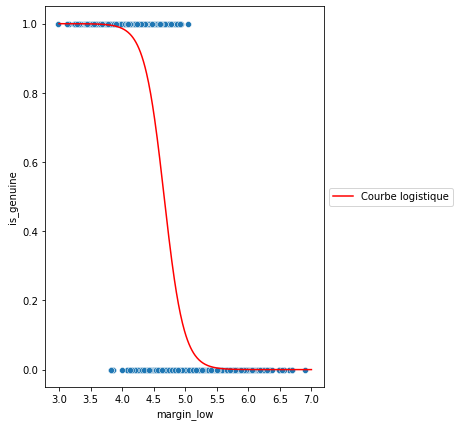

In [113]:
# Courbe logistique
x = np.linspace(start=3, stop=7, num=500)
y = np.exp(-beta1-beta2*x)/(1+np.exp(-beta1-beta2*x))
reg_log = pd.DataFrame(data={'margin_low': x, 'prop_is_genuine': y})

# Graphique
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=billets_clean2)
plt.plot(reg_log['margin_low'], reg_log['prop_is_genuine'], color='red', label='Courbe logistique')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [114]:
# Sur l'ensemble des variables et non seulement margin_low:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=billets_clean2, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1463
Model:                                                   GLM   Df Residuals:                     1456
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.158
Date:                                       Thu, 25 May 2023   Deviance:                       78.315
Time:                                               09:37:36   Pearson chi2:                 2.54e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7058
Covariance Type:                                   nonrobust                      

In [115]:
# Sur l'ensemble des variables et non seulement margin_low: sans intercept(constante)
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length-1',
                   data=billets_clean2, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1463
Model:                                                   GLM   Df Residuals:                     1457
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.644
Date:                                       Thu, 25 May 2023   Deviance:                       79.289
Time:                                               09:37:36   Pearson chi2:                 1.84e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7056
Covariance Type:                                   nonrobust                      

In [116]:
# Sur l'ensemble des variables et non seulement margin_low: sans intercept(constante), et diagonal
reg_log2 = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length-1',
                   data=billets_clean2, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1463
Model:                                                   GLM   Df Residuals:                     1458
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.859
Date:                                       Thu, 25 May 2023   Deviance:                       79.718
Time:                                               09:37:36   Pearson chi2:                 1.36e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7055
Covariance Type:                                   nonrobust                      

In [117]:
# Seuil à plus de 90% est suffisant

# Régression logistique scikit-learn

In [118]:
# preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import GridSearchCV # train_test_split,

In [119]:
# Df copy de full_billets pour la partie régression
billets_reg = full_billets.copy()

In [120]:
# Récupération des valeurs (sans diagonal)
X = billets_reg[billets_reg.columns[2:]].values
y = billets_reg['is_genuine'].values

In [121]:
X

array([[104.86      , 104.95      ,   4.52      ,   2.89      ,
        112.83      ],
       [103.36      , 103.66      ,   3.77      ,   2.99      ,
        113.09      ],
       [104.48      , 103.5       ,   4.4       ,   2.94      ,
        113.16      ],
       ...,
       [104.46      , 104.12      ,   5.6845621 ,   3.61      ,
        110.31      ],
       [104.33      , 104.41      ,   5.09660744,   3.56      ,
        111.47      ],
       [104.28      , 104.29      ,   5.08647029,   3.24      ,
        111.49      ]])

In [122]:
y

array([ True,  True,  True, ..., False, False, False])

In [123]:
# Même split que k-means pour comparaison (70 - 30 %)

# X_train: Matrice données d'entrainement, X_test matrice de test, y_train: vecteur d'etiquette d'entrainement, y_test de test

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
# 30% des données dans le jeu de test  et random_state = fige la découpe

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050, 5), (450, 5), (1050,), (450,))

In [125]:
# Rappel
X_train, X_test, y_train, y_test

(array([[103.95, 103.5 ,   4.1 ,   3.08, 113.23],
        [103.68, 103.84,   4.46,   3.07, 112.74],
        [104.18, 104.04,   4.29,   2.99, 114.08],
        ...,
        [103.78, 103.65,   4.27,   3.04, 113.  ],
        [104.63, 104.44,   5.27,   3.37, 110.97],
        [103.7 , 104.27,   5.53,   3.51, 112.2 ]]),
 array([[104.06      , 104.02      ,   4.93      ,   3.33      ,
         111.59      ],
        [104.25      , 104.17      ,   4.3       ,   3.5       ,
         112.23      ],
        [104.46      , 104.3       ,   4.12      ,   3.06      ,
         113.59      ],
        ...,
        [104.65      , 104.44      ,   4.54      ,   2.99      ,
         113.16      ],
        [104.13      , 104.24      ,   5.28      ,   3.19      ,
         112.31      ],
        [104.33      , 104.41      ,   5.09660744,   3.56      ,
         111.47      ]]),
 array([ True,  True,  True, ...,  True, False, False]),
 array([False, False,  True,  True,  True,  True, False,  True, False,
        

## Modélisation

In [126]:
# fit sans contante
estimator = LogisticRegression(solver="liblinear")
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [127]:
y_pred = estimator.predict(X_test)
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,

In [128]:
# Vérification du nombre de true et false
pd.Series(y_pred).value_counts()

True     284
False    166
dtype: int64

In [129]:
# Donnée Train: Pourcentage de true et false
pd.Series(y_train).value_counts(normalize=True).round(4)

True     0.68
False    0.32
dtype: float64

In [130]:
# Donnée Test: Pourcentage de true et false
pd.Series(y_test).value_counts(normalize=True).round(4)

True     0.6356
False    0.3644
dtype: float64

In [131]:
# Probabilité
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[0.99, 0.01],
       [0.8 , 0.2 ],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.6 , 0.4 ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  ,

In [132]:
# Def Précision
def score(estimator):
    """compute and print test score"""
    
    te_score = estimator.score(X_test, y_test).round(4)
    
    print(f"score test: {te_score}")

In [133]:
# Def matrice de confusion
def confusion(y_test, y_pred):
    """display a fancy confusion matrix"""
    
    mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
    mat.columnsumns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    
    return mat

In [134]:
# Precision score: 99% sur le test
score(estimator)
confusion(y_test, y_pred)

score test: 0.9911


0    1
test_0  163    1
test_1    3  283

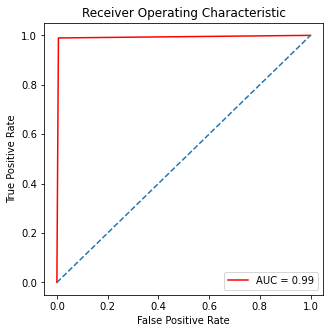

In [135]:
# ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)

# Courbe de ROC
plt.figure(figsize=(5,5))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Essai sur données production

In [136]:
# Suppression de "id" et "diagonal" sur jeu de test
billets_prod_reg_log = billets_prod_reg_log.drop(['id','diagonal'], axis=1)
billets_prod_reg_log

height_left  height_right  margin_low  margin_up  length
0       104.01        103.54        5.21       3.30  111.42
1       104.17        104.13        6.00       3.31  112.09
2       104.58        104.29        4.99       3.39  111.57
3       104.55        104.34        4.44       3.03  113.20
4       103.63        103.56        3.77       3.16  113.33

In [137]:
# Ajout de la prédiction
billets_production["pred_reg_log"] = estimator.predict(billets_prod_reg_log)
billets_production

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

  cluster  pred_reg_log  
0   False         False  
1   False         False  
2   False         False  
3    True          True  
4    True          True

# SVM

In [138]:
# fit sans contante
estimator = LinearSVC(random_state=2)#2 (1-1), 10 (0-2)
estimator.fit(X_train, y_train)

LinearSVC(random_state=2)

In [139]:
y_pred = estimator.predict(X_test)
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,

In [140]:
# Précision score: 99,6% sur le test
score(estimator)
confusion(y_test, y_pred)

score test: 0.9956


0    1
test_0  163    1
test_1    1  285

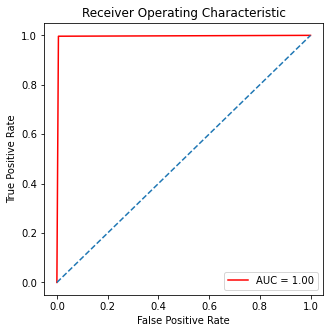

In [141]:
# ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)

# Courbe de ROC
plt.figure(figsize=(5,5))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Essai sur données production

In [142]:
# Ajout de la prédiction
billets_production["pred_reg_log_svc"] = estimator.predict(billets_prod_reg_log)
billets_production

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

  cluster  pred_reg_log  pred_reg_log_svc  
0   False         False             False  
1   False         False             False  
2   False         False             False  
3    True          True              True  
4    True          True              True

# Recherche d'hyperparamètre

In [143]:
# Régression logistique

estimator = LogisticRegression()

params = {"C": np.logspace(-3, 3, 7),
        
         "solver": ["newton-cg", "lbfgs", "liblinear"]
         }

# Recherche d'hyper parametre
grid = GridSearchCV(estimator,
                   params,
                   cv=10, # Split = 10 test et train score (cross validation)
                   n_jobs=-1, # force le travail sur l'ensemble des cpu
                   return_train_score=True, # renvoi score de train
                   verbose=1) # quantité d'info renvoyé par gridSearch

grid.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [144]:
# Affichage du meilleur paramètre
best_params = grid.best_params_
best_params

{'C': 100.0, 'solver': 'liblinear'}

In [145]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    
    res  = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    
    return res

In [146]:
# Résultat
resultize(grid).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
20       0.003790      0.001253         0.000740        0.000649  1000.0   
18       0.150697      0.019303         0.000717        0.000473  1000.0   
17       0.004685      0.001281         0.001614        0.002547   100.0   
19       0.029309      0.007024         0.000812        0.000628  1000.0   
16       0.034490      0.016408         0.000598        0.000488   100.0   
15       0.169296      0.038235         0.000717        0.000473   100.0   
14       0.004664      0.003520         0.000899        0.000300    10.0   
13       0.029669      0.006629         0.000739        0.000630    10.0   
12       0.129314      0.019641         0.000726        0.000460    10.0   
10       0.033058      0.019622         0.000798        0.000399     1.0   

   param_solver                                params  mean_test_score  \
20    liblinear  {'C': 1000.0, 'solver': 'liblinear'}         0.989524   
18    newton-cg  {'C': 1000.0, 'solver': 'newton-cg'}         0.989524   
17    liblinear   {'C': 100.0, 'solver': 'liblinear'}         0.989524   
19        lbfgs      {'C': 1000.0, 'solver': 'lbfgs'}         0.989524   
16        lbfgs       {'C': 100.0, 'solver': 'lbfgs'}         0.988571   
15    newton-cg   {'C': 100.0, 'solver': 'newton-cg'}         0.988571   
14    liblinear    {'C': 10.0, 'solver': 'liblinear'}         0.988571   
13        lbfgs        {'C': 10.0, 'solver': 'lbfgs'}         0.988571   
12    newton-cg    {'C': 10.0, 'solver': 'newton-cg'}         0.988571   
10        lbfgs         {'C': 1.0, 'solver': 'lbfgs'}         0.988571   

    std_test_score  rank_test_score  mean_train_score  std_train_score  
20        0.010817                1          0.990582         0.000879  
18        0.010817                1          0.991429         0.001455  
17        0.010817                1          0.990688         0.001037  
19        0.010817                1          0.991005         0.001515  
16        0.010257                5          0.990476         0.001058  
15        0.010257                5          0.990476         0.001706  
14        0.009331                5          0.988995         0.001178  
13        0.009331                5          0.989101         0.001257  
12        0.009331                5          0.990053         0.001079  
10        0.008303                5          0.988995         0.000970

In [147]:
# Estimation via les "coef optimum"
estimator = LogisticRegression(**best_params)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,

In [148]:
score(estimator)
confusion(y_test, y_pred)

score test: 0.9911


0    1
test_0  163    1
test_1    3  283

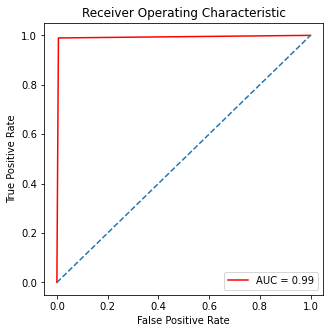

In [149]:
# ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)

# Courbe de ROC
plt.figure(figsize=(5,5))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.axis("tight")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [150]:
# Ajout colonne dans billets_production "Vrai", "Faux" avec hyperparametre
billets_production["pred_reg_log_hp"] = estimator.predict(billets_prod_reg_log)

# Récupération des valeurs de billets_production
X_billets_production = billets_production[billets_production.columns[1:6]].values

# Pourcentage de probabilité que le billet soit vrai ou faux
y_prob_bp = pd.DataFrame(estimator.predict_proba(X_billets_production).round(2))
y_prob_bp[0] = y_prob_bp[0]*100
y_prob_bp[1] = y_prob_bp[1]*100

# Intégration des pourcentages dans billets_production
billets_production["pourc_faux"] = y_prob_bp[0]
billets_production["pourc_vrai"] = y_prob_bp[1]
billets_production

# billets avec une prédiction a 100% vrai
# billets_production.loc[billets_production["pourc_vrai"] == 100]

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

  cluster  pred_reg_log  pred_reg_log_svc  pred_reg_log_hp  pourc_faux  \
0   False         False             False            False       100.0   
1   False         False             False            False       100.0   
2   False         False             False            False       100.0   
3    True          True              True             True         3.0   
4    True          True              True             True         0.0   

   pourc_vrai  
0         0.0  
1         0.0  
2         0.0  
3        97.0  
4       100.0

# Préparation du fichier final

In [151]:
billets_production = billets_production.drop(columns=["cluster","pred_reg_log", "pred_reg_log_svc"])
billets_production

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   pred_reg_log_hp  pourc_faux  pourc_vrai  
0            False       100.0         0.0  
1            False       100.0         0.0  
2            False       100.0         0.0  
3             True         3.0        97.0  
4             True         0.0       100.0

In [152]:
# Export du fichier 
billets_production.to_csv('billets_production_True_False.csv', index=False)